### Look in a little more detail at an already trained model

In [1]:
import sys
sys.path.append('..')
from cnn_common.util import *
from tensorflow.keras import models
from glob import glob
from cnn_common.taucnn_models import three_chan_adapter
from matplotlib import pyplot as plt

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [3]:
input_adapter = three_chan_adapter

In [4]:
norm_mode = 'whole_dataset'

In [5]:
model_file_name = glob('*.h5')[0]

In [6]:
print(model_file_name)

fan_in_200k_QSt2000_dataset_norm.h5


In [7]:
model = models.load_model(model_file_name)

In [8]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500, 60, 1)] 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 500, 60, 1)] 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 500, 60, 1)] 0                                            
__________________________________________________________________________________________________
convolutional_layers (Sequentia (None, 672)          318192      input_1[0][0]                    
                                                                 input_2[0][0]                

In [19]:
e_files = glob('/gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuE*')
tau_files = glob('/gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuTau*')

In [21]:
print(len(e_files),len(tau_files))

60 60


In [22]:
n_files = [3, 3]

In [23]:
try:
    with open('dataset_norm_stats.txt') as f:
        mean = float(next(f).split()[-1])
        std = float(next(f).split()[-1])
except IOError:
    mean = None
    std = None
        
print(mean)
print(std)

0.0012322452384978533
0.009694634936749935


In [24]:
%%time
tables = []
for file_list in [e_files[-n_files[0]:], tau_files[-n_files[1]:]]:
        tables.append(np.vstack([test_model_on_file(model, file, 
                                                    input_adapter=input_adapter,
                                                    norm_mode=norm_mode, 
                                                    mean=mean, 
                                                    std=std,
                                                    verbose=True) 
                                 for file in file_list]))

test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuEThreeStrings_Qtot1000_Qst400_8_6_data.npz
test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuEThreeStrings_Qtot1000_Qst400_5_0_data.npz
test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuEThreeStrings_Qtot1000_Qst400_6_5_data.npz
test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuTauThreeStrings_Qtot1000_Qst400_8_6_data.npz
test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuTauThreeStrings_Qtot1000_Qst400_4_7_data.npz
test_model_on_file: reading /gpfs/summit/home/abf5460/tauCNN/threeStringsQSt2000/NuTauThreeStrings_Qtot1000_Qst400_4_0_data.npz
CPU times: user 3min 52s, sys: 50.7 s, total: 4min 43s
Wall time: 3min 55s


In [28]:
print(tables[0])

[[4.04946834e-01 7.18962164e+11 2.64615078e+04]
 [8.90689194e-02 2.05468467e+13 1.32546125e+05]
 [2.57892400e-01 3.52304786e+15 1.18826462e+06]
 ...
 [3.75569254e-01 6.55497363e+11 1.07349131e+04]
 [3.28498781e-01 1.11457430e+14 2.86315125e+05]
 [4.07290071e-01 5.05184551e+11 2.05704141e+04]]


In [25]:
for table, n in zip(tables, n_files):
    print(per_year_past_cut(table, 0, n))

38.016489954619836
23.851005660222867


In [29]:
cuts = np.linspace(0.9, 1, 1001)
n_over = []
for cut in cuts:
    n_over.append([per_year_past_cut(table, cut, n) for table, n in zip(tables, n_files)])
n_e_over, n_tau_over = (np.array(l) for l in list(zip(*n_over)))

In [31]:
pt_99 = np.argwhere(cuts>=0.90)[0][0]
print(n_tau_over[pt_99])
print(n_e_over[pt_99])

0.9688219817361508
0.07280831077630551


In [16]:
ind = np.argwhere(n_tau_over < 0.536)[0][0]
print(n_tau_over[ind])
print(n_e_over[ind])
print(cuts[ind])

0.5358455832830338
0.0011948868007143896
0.989


In [17]:
ind = np.argwhere(n_e_over < 0.006)[0][0]
print(n_tau_over[ind])
print(n_e_over[ind])
print(cuts[ind])

0.778814873275708
0.005113418505958002
0.9732000000000001


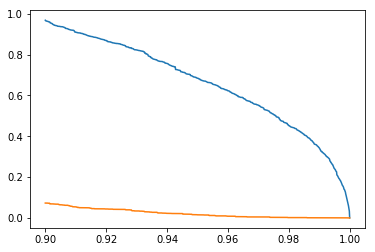

In [32]:
plt.plot(cuts, n_tau_over)
plt.plot(cuts, n_e_over)

In [19]:
pt_999 = np.argwhere(cuts>0.999)[0][0]
print(n_tau_over[pt_999])
print(n_e_over[pt_999])

0.14971858413432915
0.0


In [33]:
0.05/0.0003

166.66666666666669

In [34]:
0.3/0.0005

600.0

In [35]:
ratio = n_tau_over / np.where(n_e_over > 0 , n_e_over, 1)

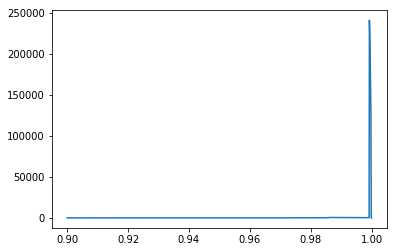

In [36]:
plt.plot(cuts, ratio)

In [24]:
ind=np.argmax(ratio)
print(n_tau_over[ind])
print(n_e_over[ind])
print(cuts[ind])

0.44270963028373794
8.019386486868522e-05
0.9931
